https://www.youtube.com/watch?v=sa7E9qUHYXw

2022-07-13 Detrending and deseasonalizing data with fourier series

#Primeiro passo

https://github.com/TheQuantPy/youtube-tutorials/blob/main/2022/003%20Jul-Sep/2022-07-13%20Detrending%20and%20deseasonalizing%20data%20with%20fourier%20series.ipynb

# De-trending and modelling seasonal variation with Fourier Series


Time series decomposition is a technique that splits a time series into several components, each representing an underlying pattern category, trend, seasonality, and noise.

1. Trend: decreasing, constant, or increasing over time?
2. Seasonality: what is the periodic signal?
3. Noise: variability in the data that cannot be explained by the model

$\large y_t = T_t + S_t + e_t$

The model (in terms of T for temperature) for deterministic seasonal mean temperature : $\large \bar{T_t}= T_{trend} + T_{seasonal}$

The DATA from pervious tutorials:

In [4]:
import os
import numpy as np
import pandas as pd
import datetime as dt
from scipy import signal
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
#https://www.statsmodels.org/stable/index.html
#https://www.statsmodels.org/stable/install.html
#https://pypi.org/project/statsmodels/
#pip install statsmodels


In [5]:
ler = pd.read_csv('dados_83361_D_1910-12-31_2024-03-27.csv', sep=";" , skiprows=10, decimal= ',')
# Dados de Cuiabá
display(ler)

,Data Medicao,"PRECIPITACAO TOTAL, DIARIO(mm)","TEMPERATURA MAXIMA, DIARIA(°C)","TEMPERATURA MINIMA, DIARIA(°C)",Unnamed: 4
0,1961-01-01,NaN,30.1,21.9,NaN
1,1961-01-02,0.0,32.4,23.9,NaN
2,1961-01-03,4.1,30.7,23.1,NaN
3,1961-01-04,14.8,30.6,23.3,NaN
4,1961-01-05,1.3,31.1,23.3,NaN
...,...,...,...,...,...
23092,2024-03-23,14.2,29.9,23.9,NaN
23093,2024-03-24,0.0,34.2,24.6,NaN
23094,2024-03-25,6.4,29.9,26.1,NaN
23095,2024-03-26,14.6,31.3,23.9,NaN


In [6]:
max_temp = ler['TEMPERATURA MAXIMA, DIARIA(°C)']
min_temp = ler['TEMPERATURA MINIMA, DIARIA(°C)']

from datetime import datetime

ler['Data Medicao']= pd.to_datetime(ler['Data Medicao'])
print(ler.info())
display(ler)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23097 entries, 0 to 23096
Data columns (total 5 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   Data Medicao                    23097 non-null  datetime64[ns]
 1   PRECIPITACAO TOTAL, DIARIO(mm)  22291 non-null  float64       
 2   TEMPERATURA MAXIMA, DIARIA(°C)  22031 non-null  float64       
 3   TEMPERATURA MINIMA, DIARIA(°C)  22084 non-null  float64       
 4   Unnamed: 4                      0 non-null      float64       
dtypes: datetime64[ns](1), float64(4)
memory usage: 902.4 KB
None


,Data Medicao,"PRECIPITACAO TOTAL, DIARIO(mm)","TEMPERATURA MAXIMA, DIARIA(°C)","TEMPERATURA MINIMA, DIARIA(°C)",Unnamed: 4
0,1961-01-01,NaN,30.1,21.9,NaN
1,1961-01-02,0.0,32.4,23.9,NaN
2,1961-01-03,4.1,30.7,23.1,NaN
3,1961-01-04,14.8,30.6,23.3,NaN
4,1961-01-05,1.3,31.1,23.3,NaN
...,...,...,...,...,...
23092,2024-03-23,14.2,29.9,23.9,NaN
23093,2024-03-24,0.0,34.2,24.6,NaN
23094,2024-03-25,6.4,29.9,26.1,NaN
23095,2024-03-26,14.6,31.3,23.9,NaN


In [7]:
ler.set_index('Data Medicao', inplace=True)


In [8]:
drop_cols = [3]

In [9]:
ler.drop(ler.columns[drop_cols], axis=1, inplace=True)


In [10]:
ler.rename(columns={'TEMPERATURA MAXIMA, DIARIA(°C)':'Tmax', 'TEMPERATURA MINIMA, DIARIA(°C)':'Tmin'}, inplace=True)

display(ler)

,"PRECIPITACAO TOTAL, DIARIO(mm)",Tmax,Tmin
Data Medicao,,,
1961-01-01,NaN,30.1,21.9
1961-01-02,0.0,32.4,23.9
1961-01-03,4.1,30.7,23.1
1961-01-04,14.8,30.6,23.3
1961-01-05,1.3,31.1,23.3
...,...,...,...
2024-03-23,14.2,29.9,23.9
2024-03-24,0.0,34.2,24.6
2024-03-25,6.4,29.9,26.1


In [11]:
ler= ler[['Tmax' ,'Tmin']]

In [12]:
# average of the temperature
def avg_temp(row):
    return (row.Tmax+row.Tmin)/2

ler['T'] = ler.apply(avg_temp,axis=1)
# # drop na values here
ler = ler.dropna()
ler_t = ler['T'].copy(deep=True)
ler_t = ler_t.to_frame()

ler_t.head(40)

,T
Data Medicao,
1961-01-01,26.00
1961-01-02,28.15
1961-01-03,26.90
1961-01-04,26.95
1961-01-05,27.20
1961-01-06,27.10
1961-01-07,28.45
1961-01-08,27.15
1961-01-09,27.85


### Daily Average Temperature Series from Cuiabá(MT) Observatory

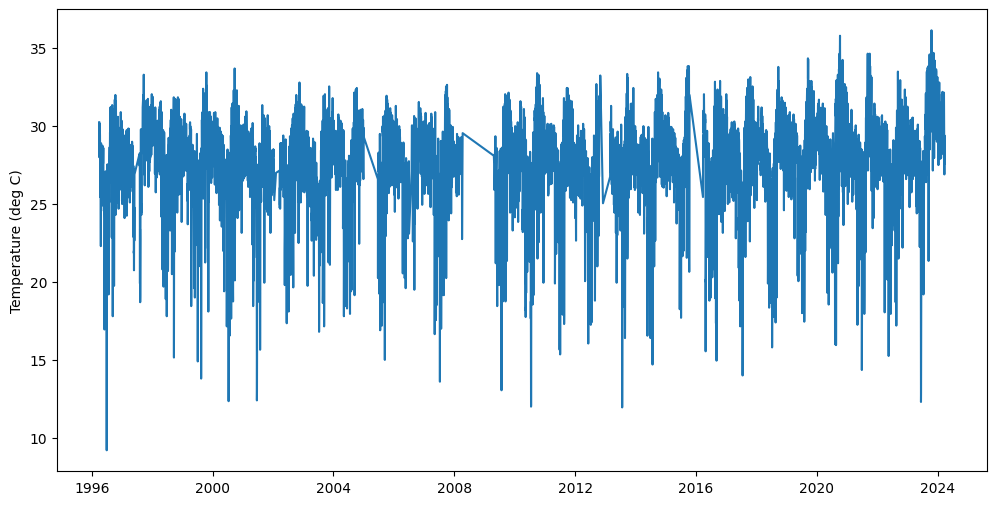

In [13]:
lookback = 365*25
fig = plt.figure(figsize=(12,6))
plt.plot(ler_t['T'][-lookback:])
plt.ylabel('Temperature (deg C)')
plt.show()

## Denoised Series

Let's remove the noise to see trend and overall peaks.

We will use a simple algorithm that is used frequently in the signal processing industry, Convolutions.
A convolution is a mathematical operation which generates a new function that is a function of two prior functions, meaning the convolution is the area under the curve of the two functions which are moved towards and away from one another ('convolved').

$\large (f * g)(x) = \int^{\infty}_{-\infty} f(\tau)g(x−\tau)d\tau$

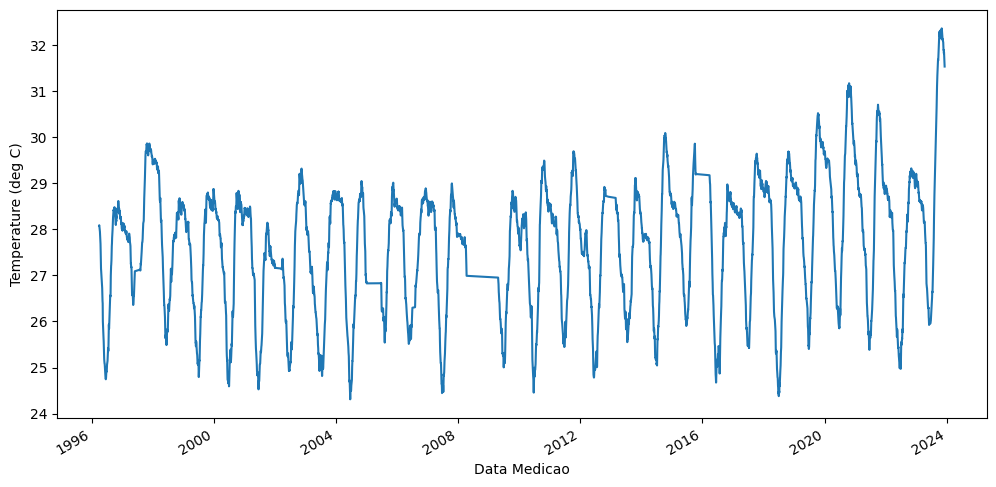

In [14]:
def apply_convolution(x, window):
    conv = np.repeat([0., 1., 0.], window)
    filtered = signal.convolve(x, conv, mode='same') / window
    return filtered

denoised = ler_t.apply(lambda x: apply_convolution(x, 90))
denoised['T'][-lookback:-100].plot(figsize=(12,6))
plt.ylabel('Temperature (deg C)')
plt.show()

## Longterm Trends

By observing the rolling moving average over time, we noticed that there is a clear but weak trend over time.  

Therefore we will simply use the following linear function.

$\Large T_{linear} = a + bt$

<AxesSubplot:title={'center':'Rolling mean over annual periods'}, xlabel='Data Medicao', ylabel='Temperature (deg C)'>

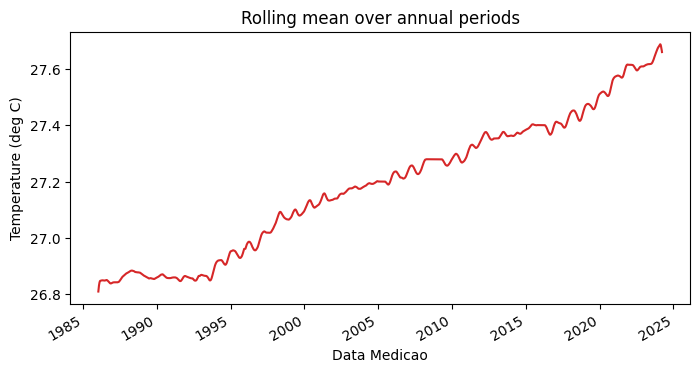

In [15]:
denoised['MA'] = denoised['T'].rolling(window = lookback).mean()
plt.ylabel('Temperature (deg C)')
denoised['MA'].plot(figsize=(8,4), color="tab:red", title="Rolling mean over annual periods")

## Seasonal Variation

The <i>denoised</i> temperature time series reveals that temperatures have somewhat uniform peaks.

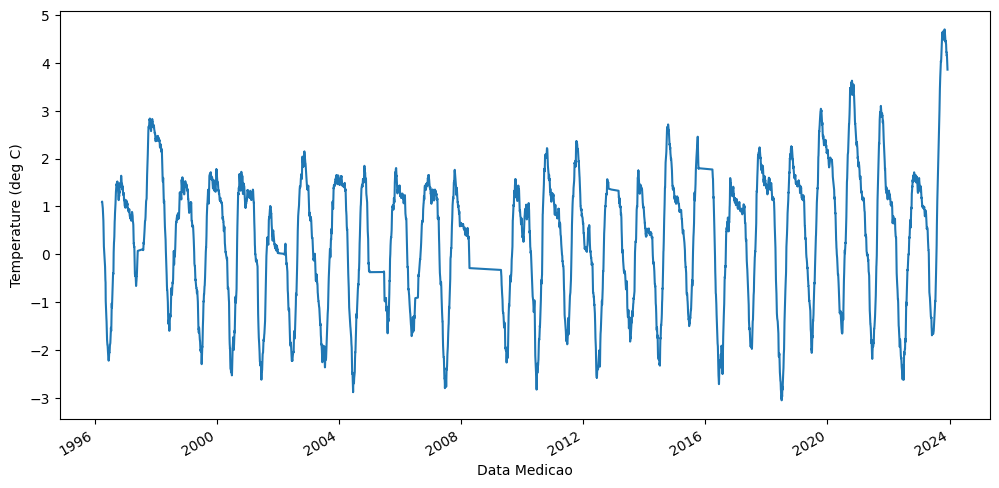

In [16]:
denoised['S'] = denoised['T'] - denoised['MA']
denoised['S'][-lookback:-100].plot(figsize=(12,6))
plt.ylabel('Temperature (deg C)')
plt.show()

We will model the seasonal variation via a truncated Fourier series of form:

$\large T_{seasonal} = a_0 + \sum_i \alpha_i sin(i \omega_1 t + \theta) + \sum_i \beta_i cos(i \omega_2 t + \phi)$

The good news is that many papers suggest that the temperature seasonal variation can be captured by the first order Fourier series.

$\large T_{seasonal} = \alpha sin(\omega t + \theta) + \beta cos(\omega t + \phi)$

The following papers has even used a simplification of a single sine function: (we will compare the two)

$\large T_{seasonal} = \alpha sin(\omega t + \theta)$

$\large T_{seasonal} = \alpha sin(\theta) cos(\omega t) + \alpha cos(\theta) sin(\omega t)$

Defining $\large a_1 = \alpha sin(\theta)$  and $\large b_1 = \alpha cos(\theta)$, we can rewrite this as:

$\large T_{seasonal} = a_1 cos(\omega t) + b_1 sin(\omega t)$

where
- $\large \alpha = \sqrt{a_1^2+b_1^2}$
- and because $\large tan(\theta) = \frac{a_1}{b_1}$: $\large \theta = tan^{-1}(\frac{a_1}{b_1})$

Notice that we assume:
- $a_0$ will be captured in the trend component
- the <i>speeds</i> of the seasonal processes are the same at $\large \omega = \frac{2\pi}{365.25}$

# De-trended & Seasonality Removed

So the deterministic seasonal mean, the denoised time series is modelled like:
    
$\large \bar{T_t}= T_{trend} + T_{seasonal}$

Test and compare two models:

1. $\large \bar{T_t} = a + bt + \alpha sin(\omega t + \theta) + \beta cos(\omega t + \phi)$
2. $\large \bar{T_t} = a + bt + \alpha sin(\omega t + \theta)$

If you want to compare non-linear model fits, check out this [link](https://stackoverflow.com/questions/23004374/how-to-calculate-the-likelihood-of-curve-fitting-in-scipy).

## Model Fitting: Non-linear Least Squares!

Here we use scipy.optimize.curve_fit which implements the Levenberg-Marquardt algorithm (LMA).

This is used in non-linear least squares problems and combines both the Gauss-Newton algorithm (GNA) and gradient descent methods.

$\Large \hat{\beta} \in argmin_\beta S(\beta) \equiv argmin_\beta \sum_{i-1}^N \left[ y_i - f(x_i, \beta) \right]^2$

In [17]:
from scipy.stats import norm
from scipy.optimize import curve_fit

In [18]:
temp_t = ler_t['T'].copy(deep=True)
temp_t = temp_t.to_frame()

In [19]:
temp_t

,T
Data Medicao,
1961-01-01,26.00
1961-01-02,28.15
1961-01-03,26.90
1961-01-04,26.95
1961-01-05,27.20
...,...
2024-03-22,29.15
2024-03-23,26.90
2024-03-24,29.40


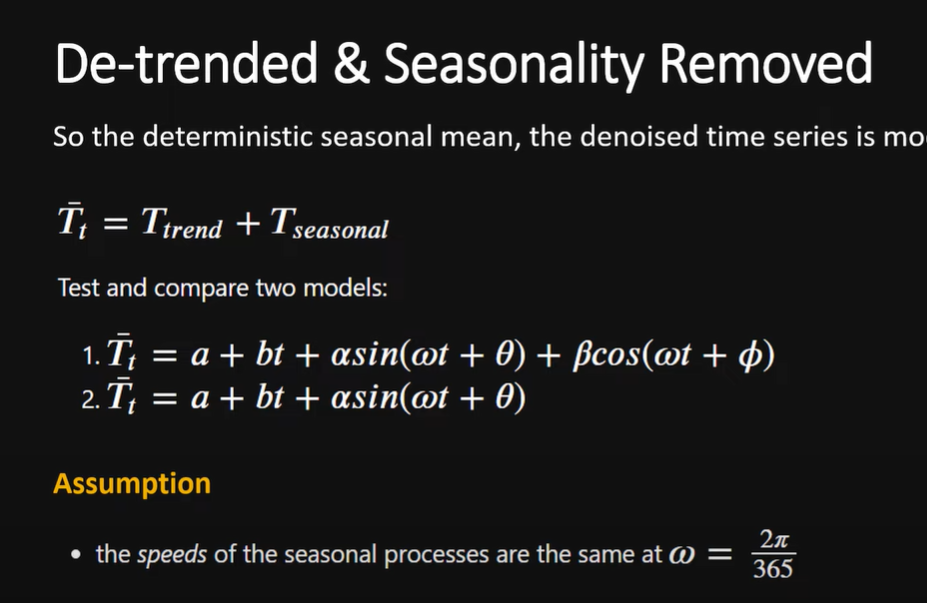

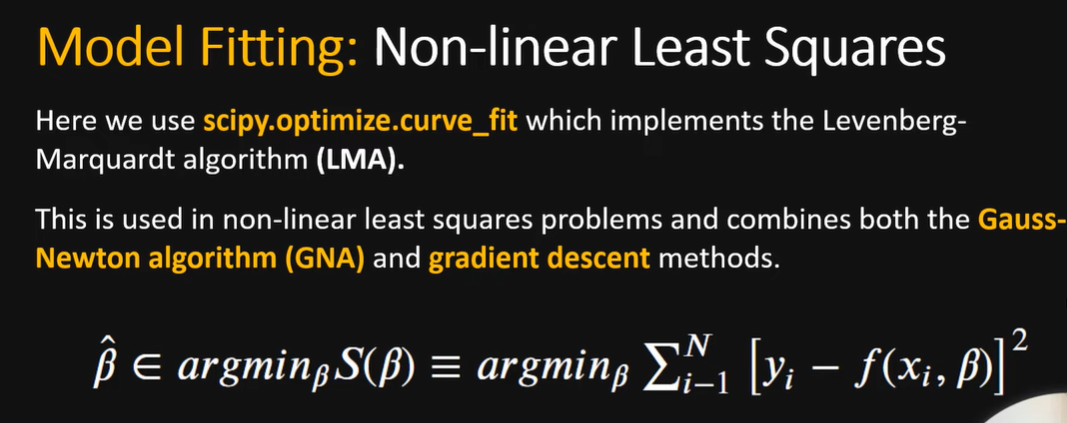

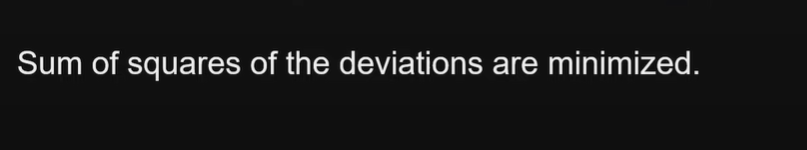


In [20]:
def model_fit_general(x, a, b, a1, b1, theta, phi):
    omega = 2*np.pi/365 #365.25

    #365 dias ao ano
    y_pred = a + b*x + a1*np.cos(omega*x + theta) + b1*np.sin(omega*x + phi)
    return y_pred

def model_fit(x, a, b, a1, b1):
    omega = 2*np.pi/365 #365.25
    #omega = 2*np.pi/142.53 #dias ao ano

    y_pred = a + b*x + a1*np.cos(omega*x) + b1*np.sin(omega*x)
    return y_pred

def RSS(y, y_pred):
    return np.sqrt( (y - y_pred)**2 ).sum()

In [21]:
if isinstance(temp_t.index , pd.DatetimeIndex):
    first_ord = temp_t.index.map(dt.datetime.toordinal)[0]
    temp_t.index=temp_t.index.map(dt.datetime.toordinal)

params, cov = curve_fit(model_fit, xdata = temp_t.index-first_ord, ydata = temp_t['T'], method='lm')

param_list = ['a', 'b', 'a1', 'b1']

print('\n Model 1 \n')
std_dev = np.sqrt(np.diag(cov))
for name, p, sd in zip( param_list, params, std_dev):
    print('{0} :  {1:0.3}  CI ~normally [{2:0.2e},{3:0.2e}]'.format(name, p, p-1.96*sd,p+1.96*sd))

temp_t['model_fit'] = model_fit(temp_t.index-first_ord, *params)

if isinstance(temp_t.index , pd.DatetimeIndex):
    temp_t.index=temp_t.index.map(dt.datetime.toordinal)
params1, cov1 = curve_fit(model_fit_general, xdata = temp_t.index-first_ord, ydata = temp_t['T'], method='lm')

param_list = ['a', 'b', 'a1', 'b1', 'theta', 'phi']

print('\n Model 1 \n')
std_dev = np.sqrt(np.diag(cov1))
for name, p, sd in zip( param_list, params1, std_dev):
    print('{0} :  {1:0.3}  CI ~normally [{2:0.2e},{3:0.2e}]'.format(name, p, p-1.96*sd,p+1.96*sd))

temp_t['model_fit_general'] = model_fit_general(temp_t.index-first_ord, *params1)


 Model 1 

a :  26.6  CI ~normally [2.65e+01,2.66e+01]
b :  6.29e-05  CI ~normally [5.79e-05,6.79e-05]
a1 :  1.81  CI ~normally [1.77e+00,1.86e+00]
b1 :  -0.211  CI ~normally [-2.58e-01,-1.64e-01]

 Model 1 

a :  26.6  CI ~normally [2.65e+01,2.66e+01]
b :  6.29e-05  CI ~normally [5.79e-05,6.79e-05]
a1 :  10.8  CI ~normally [-1.95e+06,1.95e+06]
b1 :  -11.6  CI ~normally [-1.93e+06,1.93e+06]
theta :  2.05  CI ~normally [-1.24e+04,1.24e+04]
phi :  -1.03e+02  CI ~normally [-2.68e+04,2.66e+04]


In [22]:
temp_t

,T,model_fit,model_fit_general
Data Medicao,,,
715876,26.00,28.393644,28.393557
715877,28.15,28.389807,28.389722
715878,26.90,28.385434,28.385350
715879,26.95,28.380526,28.380443
715880,27.20,28.375085,28.375003
...,...,...,...
738967,29.15,27.674696,27.674762
738968,26.90,27.643988,27.644055
738969,29.40,27.613395,27.613464


Residual Sum of Squares (RSS)
  RSS model generalised: 40358.87
  RSS model sine curve : 40359.06


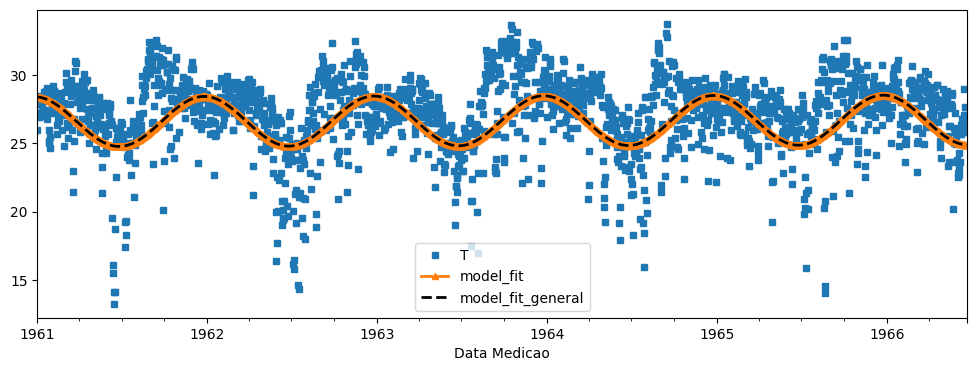

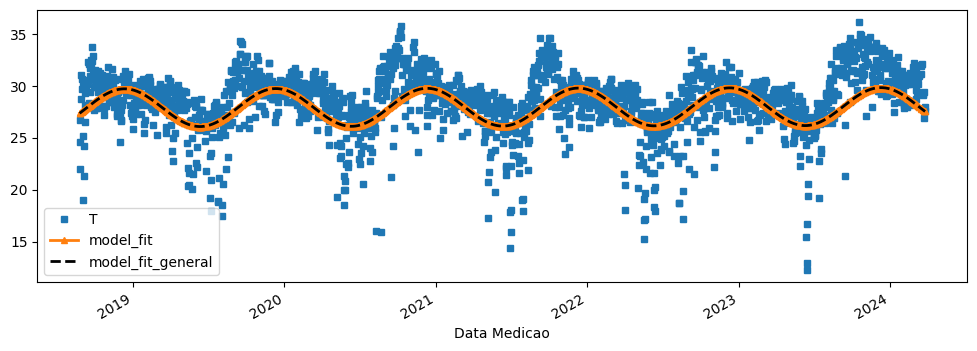

In [23]:
if not isinstance(temp_t.index , pd.DatetimeIndex):
    temp_t.index=temp_t.index.map(dt.datetime.fromordinal)

temp_t[:2000].plot(figsize=(12,4), style=['s','^-','k--'] , markersize=4, linewidth=2 )
temp_t[-2000:].plot(figsize=(12,4), style=['s','^-','k--'] , markersize=4, linewidth=2 )

RSS(temp_t['T'], temp_t['model_fit_general'])
print('Residual Sum of Squares (RSS)')
print('  RSS model generalised:', round(RSS(temp_t['T'], temp_t['model_fit_general']),2))
print('  RSS model sine curve :', round(RSS(temp_t['T'], temp_t['model_fit']),2))

Both models are equivalent, so we choose the simple one with less tuned parameters. Aiming for parsimony. There does seems to be an issue with the leading and lagging phase shifts between the 160 year intervals. This was identified as the incorrect frequency assumption of 365 days a year. .25 days over approximately 160 years accounts for a shift of approximately 40 days.

Therefore the speeds of the seasonal processes are the same at $\large \omega=\frac{2 \pi}{365.25}$

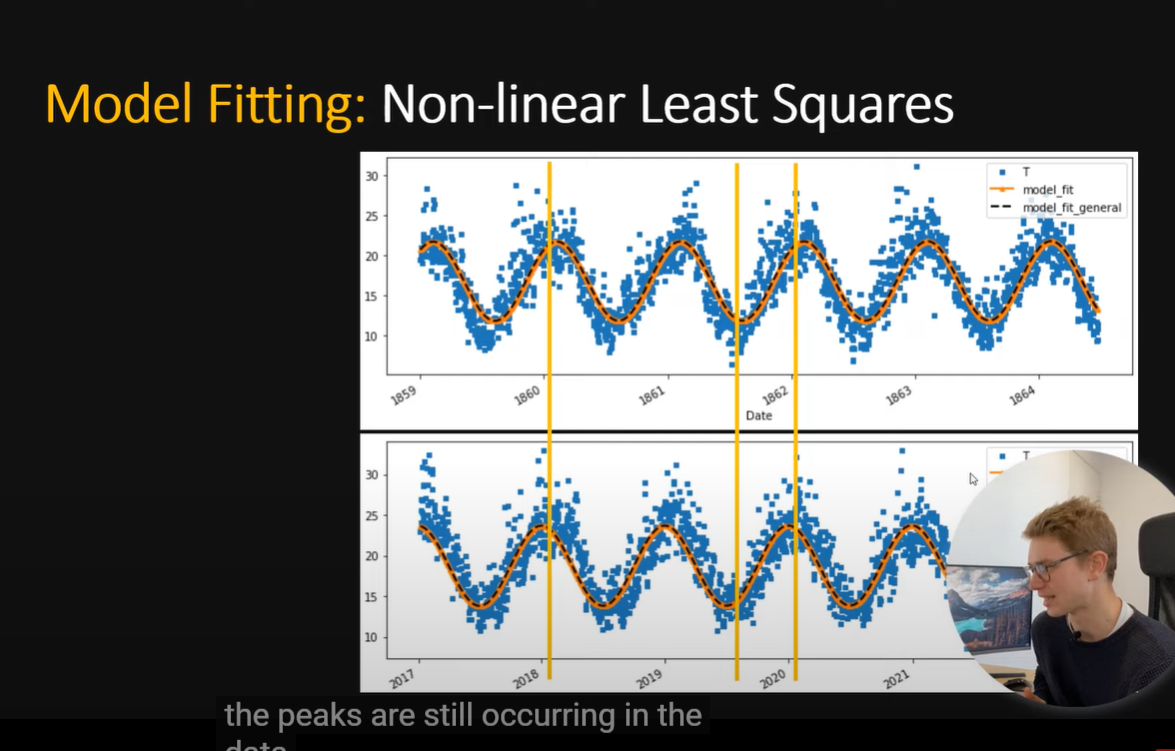

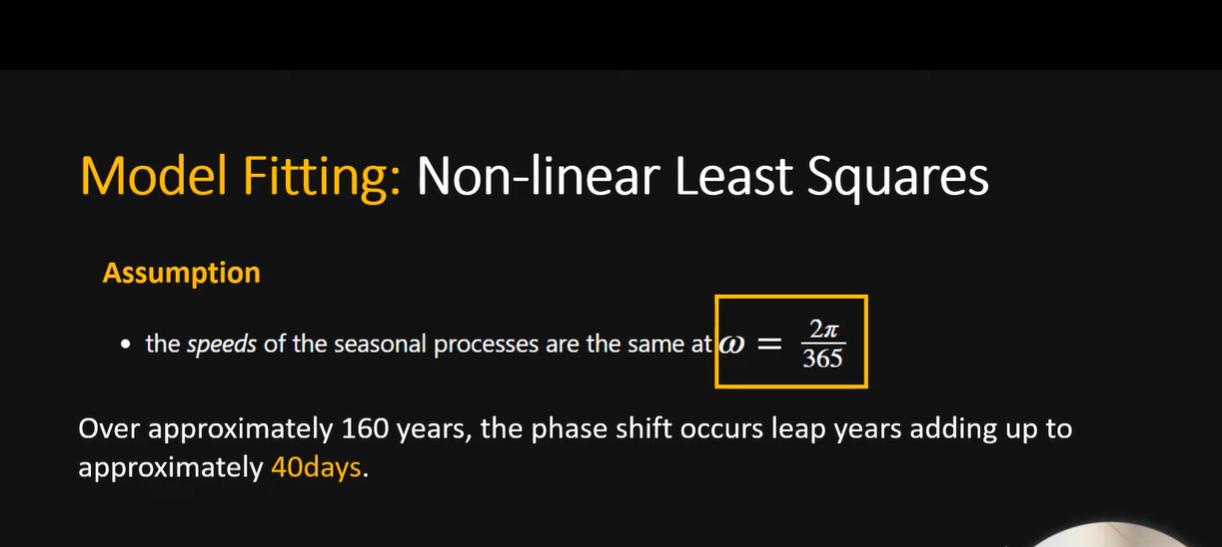

In [24]:
from pandas import Timestamp
from datetime import datetime

#analisar os dados por completo

def is_leap_year(year):
    """Verifica se um ano é bissexto."""
    return (year % 4 == 0 and year % 100 != 0) or (year % 400 == 0)

def days_in_year(year):
    """Retorna o número de dias em um ano específico."""
    return 366 if is_leap_year(year) else 365

lista_data= list(ler_t.index)
#print(lista_data)
# Extracting year from each timestamp
years_list = [datetime.strptime(ts.strftime("%Y-%m-%d"), "%Y-%m-%d").year for ts in lista_data]
years_list= set(years_list)
print(years_list)
dias_lista = [ days_in_year(ano)  for ano in years_list]
print(dias_lista)
anos_bissetos= [ ano  for ano in years_list if days_in_year(ano) > 365]
print()
print(anos_bissetos)
print(len(anos_bissetos), 'quantidade de anos bissetos\n', len(years_list), 'quantidade total de anos'  )

{1961, 1962, 1963, 1964, 1965, 1966, 1967, 1968, 1969, 1970, 1971, 1972, 1973, 1974, 1975, 1976, 1977, 1978, 1979, 1980, 1981, 1982, 1983, 1984, 1985, 1986, 1987, 1988, 1989, 1990, 1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022, 2023, 2024}
[365, 365, 365, 366, 365, 365, 365, 366, 365, 365, 365, 366, 365, 365, 365, 366, 365, 365, 365, 366, 365, 365, 365, 366, 365, 365, 365, 366, 365, 365, 365, 366, 365, 365, 365, 366, 365, 365, 365, 366, 365, 365, 365, 366, 365, 365, 365, 366, 365, 365, 365, 366, 365, 365, 365, 366, 365, 365, 365, 366, 365, 365, 365, 366]

[1964, 1968, 1972, 1976, 1980, 1984, 1988, 1992, 1996, 2000, 2004, 2008, 2012, 2016, 2020, 2024]
16 quantidade de anos bissetos
 64 quantidade total de anos


In [25]:
# Calculando o número total de dias e dividindo pelo número total de anos
dias_totais = ((len(years_list) -len(anos_bissetos)) * 365 + len(anos_bissetos) * 366)
media_dias_por_ano = dias_totais / len(years_list)
print("Média de dias por ano:", media_dias_por_ano)

Média de dias por ano: 365.25


In [26]:
def eh_bissexto(ano):
    if ano % 4 == 0:
        if ano % 100 == 0:
            if ano % 400 == 0:
                return True
            else:
                return False
        else:
            return True
    else:
        return False

# Definindo o intervalo de anos
ano_inicial = 1859
ano_final = 2022

# Contador para armazenar o número de anos bissextos
anos_bissextos = 0

# Iterar sobre cada ano no intervalo
for ano in range(ano_inicial, ano_final + 1):
    if eh_bissexto(ano):
        anos_bissextos += 1

print("Entre", ano_inicial, "e", ano_final, "há", anos_bissextos, "anos bissextos.")
print('anos totais', ano_final-ano_inicial)
#print(float(((163-40)*365 + 40**366)/163))

Entre 1859 e 2022 há 40 anos bissextos.
anos totais 163


In [27]:
# Definindo os anos inicial e final
ano_inicial = 1859
ano_final = 2022

# Contando os anos totais e os anos bissextos
anos_totais = ano_final - ano_inicial + 1  # Adicionamos 1 para incluir o ano final
anos_bissextos = sum(1 for ano in range(ano_inicial, ano_final + 1) if eh_bissexto(ano))

# Calculando o número total de dias e dividindo pelo número total de anos
dias_totais = (anos_totais - anos_bissextos) * 365 + anos_bissextos * 366
media_dias_por_ano = dias_totais / anos_totais

print("Entre", ano_inicial, "e", ano_final, "há", anos_bissextos, "anos bissextos.")
print('anos totais', anos_totais)
print("Média de dias por ano:", media_dias_por_ano)

Entre 1859 e 2022 há 40 anos bissextos.
anos totais 164
Média de dias por ano: 365.2439024390244


In [28]:
temp_t = ler_t['T'].copy(deep=True)
temp_t = temp_t.to_frame()

In [29]:
def model(x, params):
    a,b,a1,b1 = params
    omega = 2*np.pi/365.25 #365.25
    
    theta = np.arctan(a1/b1)
    alpha = np.sqrt( a1**2 + b1**2)
    print('Parameters:\n     a {0:0.3}\n     b {1:0.3}\n alpha {2:0.3}\n theta {3:0.3}'.format(a,b,alpha,theta))
    y_pred = a + b*x + alpha*np.sin(omega*x + theta)
    return y_pred

def model_fit(x, a, b, a1, b1):
    omega = 2*np.pi/365.25
    y_pred = a + b*x + a1*np.cos(omega*x) + b1*np.sin(omega*x)
    return y_pred


In [30]:
if isinstance(temp_t.index , pd.DatetimeIndex):
    first_ord = temp_t.index.map(dt.datetime.toordinal)[0]
    temp_t.index=temp_t.index.map(dt.datetime.toordinal)

params_all, cov = curve_fit(model_fit, xdata = temp_t.index-first_ord, ydata = temp_t['T'], method='lm')

print(params_all)
print()
print(cov)

[ 2.65813465e+01  6.29328917e-05  1.76425804e+00 -4.53685378e-01]

[[ 1.11729005e-03 -7.32927830e-08 -1.45963552e-06 -7.20787865e-06]
 [-7.32927830e-08  6.51431082e-12  5.83035900e-10  8.54601543e-10]
 [-1.45963552e-06  5.83035900e-10  5.90247877e-04 -2.11473163e-06]
 [-7.20787865e-06  8.54601543e-10 -2.11473163e-06  5.80584460e-04]]


In [31]:

temp_t['model'] = model(temp_t.index-first_ord, params_all)
# temp_t['model_fit'] = model_fit(temp_t.index-first_ord, *params)
display(temp_t)



Parameters:
     a 26.6
     b 6.29e-05
 alpha 1.82
 theta -1.32


,T,model
Data Medicao,,
715876,26.00,24.817088
715877,28.15,24.825217
715878,26.90,24.833864
715879,26.95,24.843029
715880,27.20,24.852709
...,...,...
738967,29.15,28.146306
738968,26.90,28.177629
738969,29.40,28.208909


<AxesSubplot:xlabel='Data Medicao'>

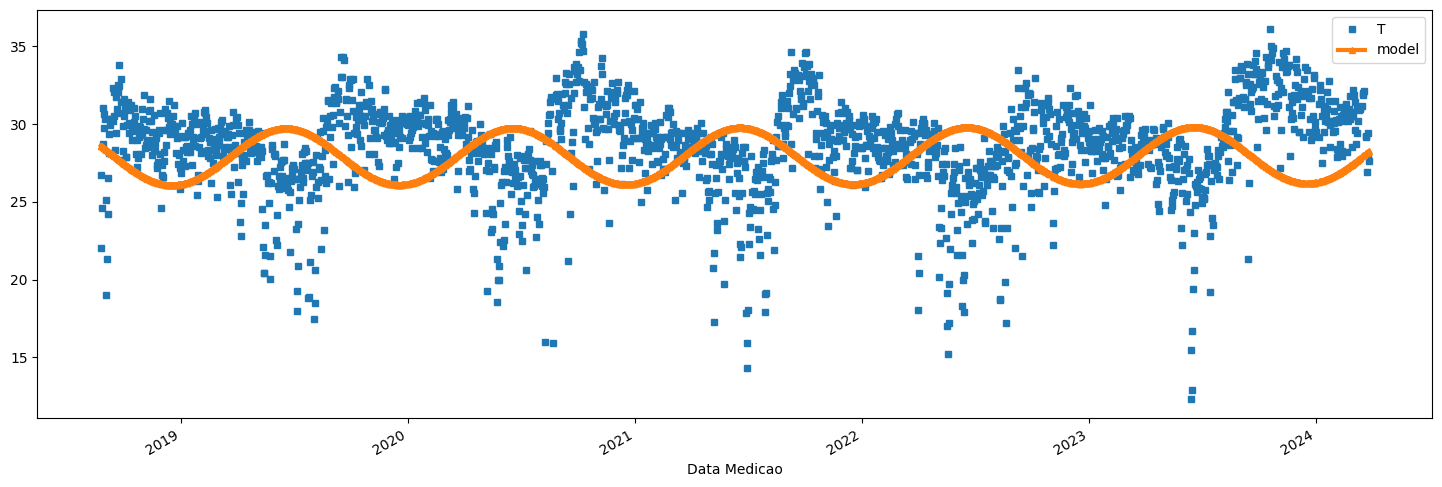

In [32]:
if not isinstance(temp_t.index , pd.DatetimeIndex):
    temp_t.index=temp_t.index.map(dt.datetime.fromordinal)

temp_t[-2000:].plot(figsize=(18,6), style=['s','^-','k-'] , markersize=4, linewidth=3 )

In [33]:
temp_t.index[0]

Timestamp('1961-01-01 00:00:00')

## Our Model for the trend and seasonality

This is our changing average of DAT.

$\large \bar{T_t} = a + bt + \alpha sin(\omega t + \theta)$

Where our changing average of DAT $\large \bar{T_t}$ is:

$\large \bar{T_t} = 26.6 + (6.29e-05)t + 1.82 sin((\frac{2\pi}{365.25})t -1.32)$

Where the date <b>01-Jan 1859</b> corresponds with the first ordinal number 0.

In [34]:
if isinstance(temp_t.index , pd.DatetimeIndex):
    first_ord = temp_t.index.map(dt.datetime.toordinal)[0]
    temp_t.index=temp_t.index.map(dt.datetime.toordinal)
temp_t['model'] = model(temp_t.index-first_ord, params_all)

Parameters:
     a 26.6
     b 6.29e-05
 alpha 1.82
 theta -1.32


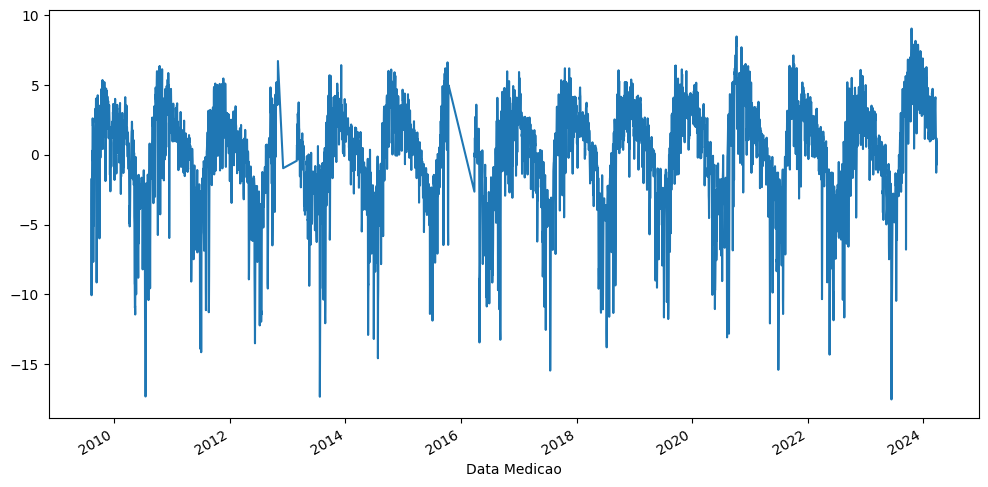

In [35]:
if not isinstance(temp_t.index , pd.DatetimeIndex):
    temp_t.index=temp_t.index.map(dt.datetime.fromordinal)

temp_t['res'] = temp_t['T']-temp_t['model']
temp_t['res'][-5000:].plot(figsize=(12,6))
plt.show()

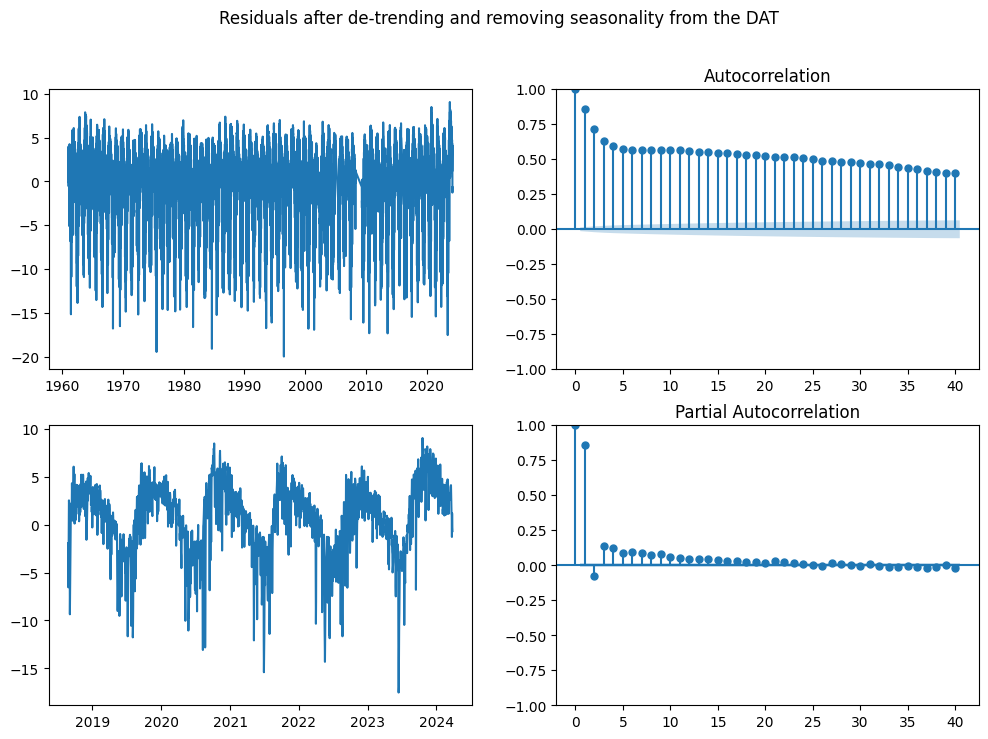

In [36]:
fig, axs = plt.subplots(2,2, figsize=(12,8))
fig.suptitle('Residuals after de-trending and removing seasonality from the DAT')
axs[0,0].plot(temp_t['res'])
axs[1,0].plot(temp_t['res'][-2000:])
plot_acf(temp_t['res'], lags=40, ax=axs[0,1])
plot_pacf(temp_t['res'], lags=40, ax=axs[1,1])
plt.show()

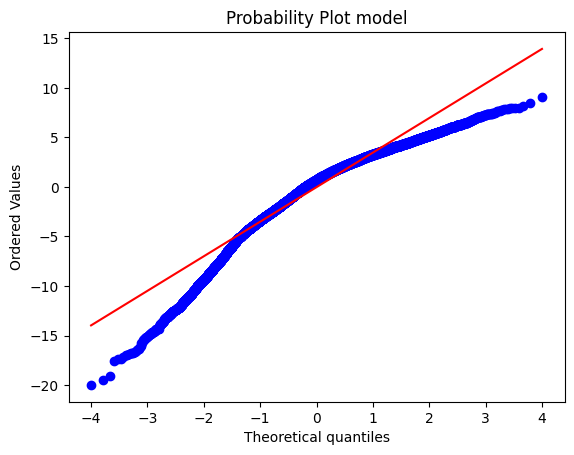

In [37]:
import scipy.stats as stats
stats.probplot(temp_t['res'], dist="norm", plot=plt)
plt.title("Probability Plot model")
plt.show()

P(Z > 2): 0.156% vs Normal Distibution: 2.28% 
SKEW    : -1.07
KURTOSIS: 4.54


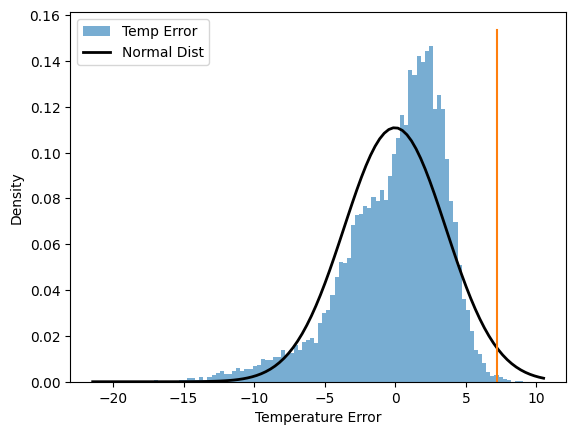

In [38]:
mu, std = norm.fit(temp_t['res'])
z = (temp_t['res'] - mu)/std
plt.hist(temp_t['res'], density=True, alpha=0.6, bins=100, label='Temp Error')

xmin, xmax = plt.xlim()
ymin, ymax = plt.ylim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, mu, std)
data = np.random.randn(100000)

plt.plot(x, p, 'k', linewidth=2, label='Normal Dist')
plt.plot([std*2,std*2],[0,ymax])

print('P(Z > 2): {:0.3}% vs Normal Distibution: {:0.3}% '.format(len(z[z >= 2])/len(z)*100, (1-norm.cdf(2))*100))
print('SKEW    : {:0.3}'.format(stats.skew(z)))
print('KURTOSIS: {:0.3}'.format(stats.kurtosis(z)+3))
plt.ylabel('Density')
plt.xlabel('Temperature Error')
plt.legend()
plt.show()